In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import urllib
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,accuracy_score
from sklearn.linear_model import LinearRegression


#req = urllib.request.urlretrieve('https://covid19.who.int/WHO-COVID-19-global-data.csv',filename = 'WHO-COVID-19-global-data.csv')
data = pd.read_csv('/home/arsath/Data-science-main/WHO-COVID-19-global-data.csv')
class Corona:
    title_size = {'fontsize':16}
    label_size = 15
    font_size  = 20
    fig_size   = (12,6)
    label_rotation = 90
    
    def __init__(self):
        self.data =  data.copy()
        self.data['Date_reported'] = pd.to_datetime(self.data['Date_reported'])
        self.data = self.data[self.data['Date_reported'].dt.year == 2020]

        self.high_cumulative_cases      = None
        self.high_cumulative_deaths     = None
        self.overall_df                 = None
        self.countries                  = None
        
        
        to_remove = self.data[self.data.loc[:,'WHO_region'] == 'Other']
        #print(to_remove.loc[:,['Cumulative_cases','Cumulative_deaths']].max() )
        # Since it does not make much difference in our data we will remove that from our data
        #print(f'Before Removing {self.data.shape}')
        self.data.drop(index = to_remove.index,inplace=True)
        #print(self.data.dtypes)
        #self.data['Date_reported'] = pd.to_datetime(self.data['Date_reported'])
        #print(self.data.dtypes)
        #print(f'After Removing {self.data.shape}')
        #print(self.data.isna().any())
        #print(self.data['Country_code'].isna().sum())
        null_values = self.data[self.data.loc[:,'Country_code'].isna()]
        self.data['Country_code'].fillna(null_values.loc[:,'Country'].str[0:2],inplace = True)
        #print(self.data['Date_reported'].agg(('min','max')))
        self.data.set_index('Country',inplace=True)
        self.overall_df = self.data.groupby(self.data.index).last() # For the purpose of getting highest cumulative cases for each country
        self.high_cumulative_cases   = self.overall_df.sort_values('Cumulative_cases',ascending = False)
        self.high_cumulative_deaths  = self.overall_df.sort_values('Cumulative_deaths',ascending = False)
        self.countries               = self.high_cumulative_cases.index[0:5]

    def cumulative_cases(self): 
        
        '''
        Definition: This Method plots the Overall no.of.New_Cases of top20 countries that is affected the most.
        
        Parameters: None
        
        Returns: Data of all the countries that are affected the most by new_cases in the order of high to low
        '''
        
        x = self.high_cumulative_cases.index[0:20]
        y = self.high_cumulative_cases.loc[:,'Cumulative_cases'][0:20]
        plt.figure(figsize = self.fig_size)
        plt.title('Countries Affected the most by Cumulative_Cases',fontdict= self.title_size)
        high_cum_case_plt  = sns.barplot(x = x, y = y,palette = 'Blues_d')
        high_cum_case_plt.tick_params(labelrotation = self.label_rotation,labelsize = self.label_size,axis = 'x')
        high_cum_case_plt.tick_params(labelsize = self.label_size,axis = 'y')
        plt.xlabel('Countries',fontsize = self.font_size)
        plt.ylabel('Cumulative_Cases',fontsize = self.font_size)
        plt.show()
        return self.high_cumulative_cases

    def cumulative_deaths(self):
        
        '''
        Definition : This Method plots the Overall no.of.Deaths of top20 countries that is affected the most.
        
        Parameters : None
        
        Returns: Data of all the countries that are affected the most by new_deaths in the order of high to low.
        '''
        
        x = self.high_cumulative_deaths.index[0:20]
        y = self.high_cumulative_deaths.loc[:,'Cumulative_deaths'][0:20]
        plt.figure(figsize  = self.fig_size)
        plt.title('Countries Affected the most by Cumulative_Deaths',fontdict = self.title_size)
        high_cum_deaths_plt = sns.barplot(x = x , y = y , palette = 'Blues_d')
        high_cum_deaths_plt.tick_params(labelrotation = self.label_rotation , labelsize = self.label_size,axis = 'x')
        high_cum_deaths_plt.tick_params(labelsize = self.label_size , axis = 'y')
        plt.xlabel('Countries',fontsize = self.font_size)
        plt.ylabel('Cumulative_Deaths',fontsize = self.font_size)
        plt.show()
        return self.high_cumulative_deaths
    
    def avg_new_cases(self,countries = None):
        
        '''
        Definition: This method plots average no.of.cases among countries
        
        Parameters: list of countries if left by default it will take top 5 countries with high number of overall new_cases
       
        Returns: None
        '''
        
        if countries is None:
            countries = self.countries
        for country in countries:
            x = self.data.loc[country].loc[:,'Date_reported'].dt.month
            y = self.data.loc[country].loc[:,'New_cases']
            plt.figure(figsize = self.fig_size)
            plt.title(country,fontdict = self.title_size)
            sns.barplot(x = x,y = y)
            plt.xlabel( 'MONTHS',fontsize = self.font_size)
            plt.ylabel( 'AVG_NEW_CASES',fontsize = self.font_size)
            plt.tick_params(labelsize = self.label_size)
            plt.grid(True)
            plt.show();

    def avg_new_deaths(self,countries = None):
        
        '''
        
        Definition: This method plots average no.of.Deaths among countries
        
        Parameters: list of countries if left by default it will take top 5 countries with high number of overall new_cases
       
        Returns: None
        '''
        
        if countries is None:
            countries = self.countries 
        for country in countries:
            x = self.data.loc[country].loc[:,'Date_reported'].dt.month
            y = self.data.loc[country].loc[:,'New_deaths']
            plt.figure(figsize = self.fig_size)
            plt.title(country,fontdict = self.title_size)
            sns.barplot(x = x,y = y)
            plt.xlabel( 'MONTHS',fontsize = self.font_size)
            plt.ylabel( 'AVG_NEW_DEATHS',fontsize = self.font_size)
            plt.tick_params(labelsize = self.label_size)
            plt.grid(True)
            plt.show();

    def most_affected_countries(self, by = 'New_cases'):
        
        '''
        Defnition: This Method plots the line plot for the given inputs for given Y_col
        
        Parameters: by -> 'New_cases' or 'New_deaths'
        
        Returns: None
        '''
        
        plt.figure(figsize = self.fig_size)
        plt.title(f'Most Affected Countries by {by}',fontdict= self.title_size)
        for country in self.countries:
            x = self.data.loc[country].loc[:,'Date_reported'].dt.month
            y = self.data.loc[country].loc[:,by]
            sns.lineplot(x = x,y = y,label = country)
        plt.xlabel('MONTHS',fontsize = self.font_size)
        plt.ylabel( 'AVG'+' '+by.upper(),fontsize = self.font_size)
        plt.tick_params(labelsize = self.label_size)
        plt.grid(True)
        plt.show();
    
    def most_affected_region(self):
        
        '''
        Definition: Returns the Series which shows highly affected region among world  
    
        Parameters: None
    
        Returns : Series of WHO_regions which are affected the most overall
        
        '''
        
        median = self.overall_df.loc[:,'Cumulative_cases'].sort_values(ascending = False).median()
        return self.overall_df[self.overall_df.loc[:,'Cumulative_cases'] >= median].value_counts(subset = 'WHO_region',ascending = False)

    def world_analysis(self, by = 'New_cases'):
        
        '''
        Definition: Shows how Disease is spread over the months
    
        Parameters: by -> New_cases or New_deaths
    
        Returns : None
        
        '''
        plt.figure(figsize = self.fig_size)
        plt.title(f'world Data by {by}',fontdict = self.title_size)
        x = self.data.loc[:,'Date_reported'].dt.month
        y = self.data.loc[:,by]
        sns.barplot(x = x , y = y)
        plt.xlabel('MONTHS',fontsize = self.font_size)
        plt.ylabel('AVG'+' '+by.upper(),fontsize = self.font_size)
        plt.tick_params(labelsize = self.label_size)
        plt.grid(True)
        plt.show()

    
    def case_and_death(self,countries = None):
         
        '''
        Definition: plots how disease is being affected the countries by plotting both New_Cases and New_Deaths
    
        Parameters: Country or Countries to plot
        '''
        if countries == None:
            countries = self.countries
        for country in countries:
            x = self.data.loc[country].loc[:,'New_cases']
            y = self.data.loc[country].loc[:,'New_deaths']
            
            plt.figure(figsize = self.fig_size)
            plt.title(country,fontdict = self.title_size)
            sns.scatterplot(x = x, y = y,data = self.data.loc[country])
            plt.xlabel('New_cases',fontsize = self.font_size)
            plt.ylabel('New_deaths',fontsize = self.font_size)
            plt.tick_params(labelsize = self.label_size)
            plt.show()

        
    def cnt_data(self,arg = 'New_cases',cnt_name = 'India'):
        
        '''
        Definition: Creates a plot how Country progressed over time
    
        Parameters: arg -> New_cases or New_Deaths , Name of the Country to plot.
        
        '''
        y = np.array(self.data.loc[cnt_name].loc[:,arg])
        plt.figure(figsize = self.fig_size)
        plt.title(f'{arg} Over Time in {cnt_name}',fontdict=self.title_size)
        plt.plot(y,'--*')
        plt.xlabel('Days',fontsize=self.font_size)
        plt.ylabel(f'{arg}',fontsize=self.font_size)
        plt.tick_params(labelsize = self.label_size)
        plt.show()
        
    def Linear_Regression(self,cnt_name = 'India'):
        
        '''
        Definition: Creates a Basic Linear Regression model to predict the Cases over time
    
        Parameters: Country or Countries to build model
        
        '''
    
        max_threshold = self.data.loc[cnt_name].loc[:,'New_deaths'].quantile(0.98)
        data = self.data.loc[cnt_name][self.data.loc[cnt_name]['New_deaths'] <= max_threshold]

        
        x = np.array(data.loc[cnt_name:,'New_cases']).reshape(-1,1)
        y = np.array(data.loc[cnt_name:,'New_deaths']).reshape(-1,1)
        
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
        
        
        lin = LinearRegression()
        lin.fit(x_train,y_train)
        
        predictor = lin.predict(x_test)
        
        plt.figure(figsize = self.fig_size)
        plt.title('Linear Regression',fontdict= self.title_size)
        plt.scatter(x_train,y_train)
        plt.plot(x_test,predictor,color  = 'red',linewidth = 3)
        plt.xlabel('New_Cases',fontsize  = self.font_size)
        plt.ylabel('New_Deaths',fontsize = self.font_size)
        plt.tick_params(labelsize = self.label_size)
        plt.show()
        
        print(explained_variance_score(predictor,y_test) * 100)
    
class Corona_2021(Corona):
    def __init__(self):
        self.data =  data.copy()
        self.data['Date_reported'] = pd.to_datetime(self.data['Date_reported'])
        self.data = self.data[self.data['Date_reported'].dt.year == 2021]

        self.high_cumulative_cases      = None
        self.high_cumulative_deaths     = None
        self.overall_df                 = None
        self.countries                  = None
        
        
        to_remove = self.data[self.data.loc[:,'WHO_region'] == 'Other']
        #print(to_remove.loc[:,['Cumulative_cases','Cumulative_deaths']].max() )
        # Since it does not make much difference in our data we will remove that from our data
        #print(f'Before Removing {self.data.shape}')
        self.data.drop(index = to_remove.index,inplace=True)
        #print(self.data.dtypes)
        #self.data['Date_reported'] = pd.to_datetime(self.data['Date_reported'])
        #print(self.data.dtypes)
        #print(f'After Removing {self.data.shape}')
        #print(self.data.isna().any())
        #print(self.data['Country_code'].isna().sum())
        null_values = self.data[self.data.loc[:,'Country_code'].isna()]
        self.data['Country_code'].fillna(null_values.loc[:,'Country'].str[0:2],inplace = True)
        #print(self.data['Date_reported'].agg(('min','max')))
        self.data.set_index('Country',inplace=True)
        self.overall_df = self.data.groupby(self.data.index).last() # For the purpose of getting highest cumulative cases for each country
        self.high_cumulative_cases   = self.overall_df.sort_values('Cumulative_cases',ascending = False)
        self.high_cumulative_deaths  = self.overall_df.sort_values('Cumulative_deaths',ascending = False)
        self.countries               = self.high_cumulative_cases.index[0:5]


In [138]:
covid = Corona()

In [139]:
covid.most_affected_region()

WHO_region
EURO     47
AMRO     20
AFRO     18
EMRO     18
WPRO      8
SEARO     7
dtype: int64

### The Above code says that the EUROPEAN countries are highly affected by Corona disease

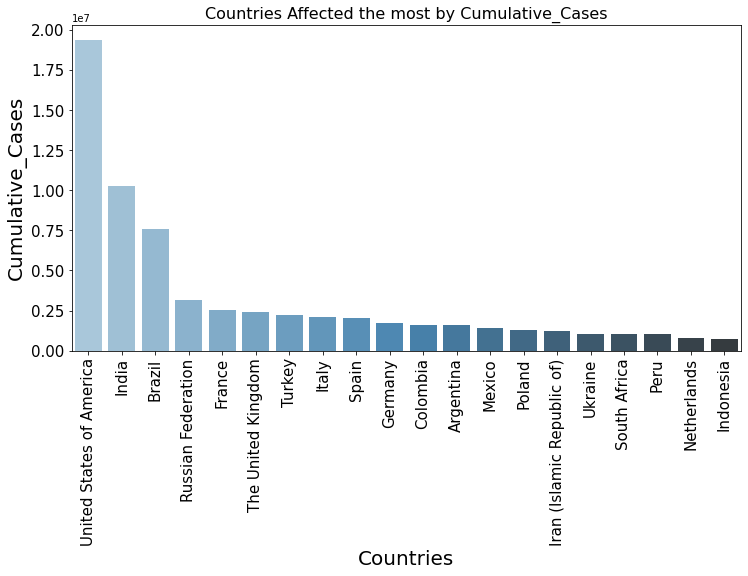

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
United States of America,2020-12-31,US,AMRO,199163,19346790,3366,335789
India,2020-12-31,IN,SEARO,21822,10266674,299,148738
Brazil,2020-12-31,BR,AMRO,58718,7563551,1111,192681
Russian Federation,2020-12-31,RU,EURO,27747,3159297,593,57019
France,2020-12-31,FR,EURO,26308,2556708,303,64004
...,...,...,...,...,...,...,...
Tonga,2020-12-31,TO,WPRO,0,0,0,0
Tokelau,2020-12-31,TK,WPRO,0,0,0,0
Micronesia (Federated States of),2020-12-31,FM,WPRO,0,0,0,0


In [140]:
covid.cumulative_cases()

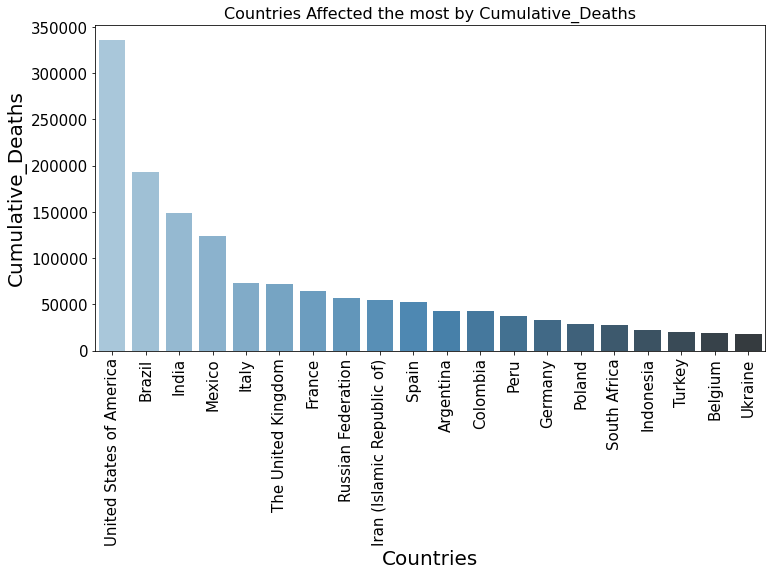

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
United States of America,2020-12-31,US,AMRO,199163,19346790,3366,335789
Brazil,2020-12-31,BR,AMRO,58718,7563551,1111,192681
India,2020-12-31,IN,SEARO,21822,10266674,299,148738
Mexico,2020-12-31,MX,AMRO,12099,1401529,990,123845
Italy,2020-12-31,IT,EURO,16202,2083689,575,73604
...,...,...,...,...,...,...,...
Bhutan,2020-12-31,BT,SEARO,19,655,0,0
Timor-Leste,2020-12-31,TL,SEARO,0,44,0,0
Pitcairn Islands,2020-12-31,PN,WPRO,0,0,0,0


In [106]:
covid.cumulative_deaths()

### Again US tops the list in Overall New Cases at a rate of 1.9 * 10^ 7   and   New Deaths at a rate of 350,000  above Deaths Overall

### Brazil is in  Third place in overall New Cases and second place in overall deaths

### Though India is in  Second place, by considering INDIA's population India have been contained very well

### Mexico is facing less cases and more deaths in their country 

### Considering other countries population like UK,Mexico, Brazil they are in the poor place as well


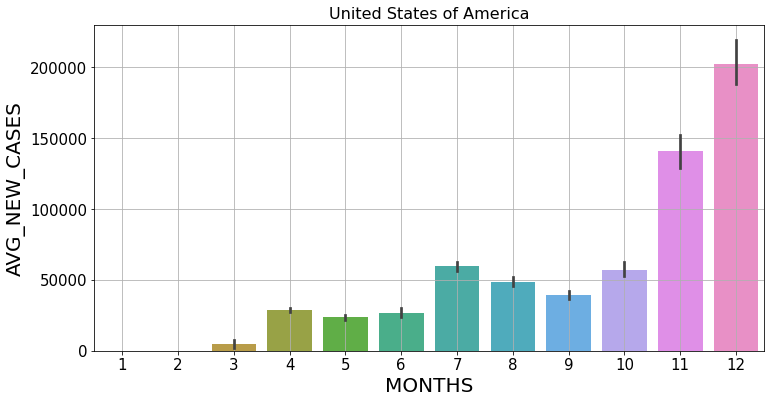

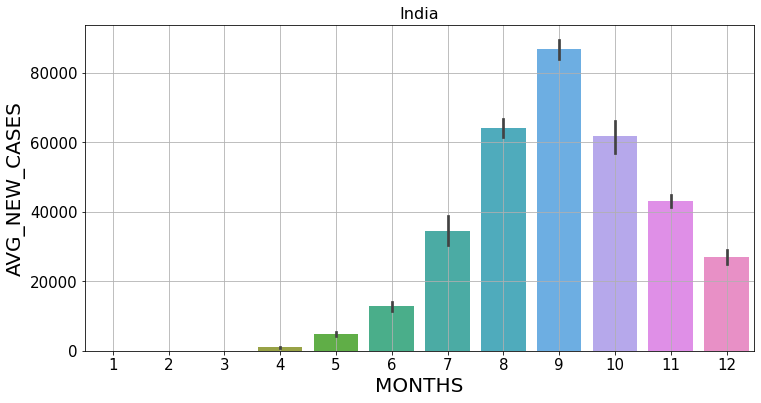

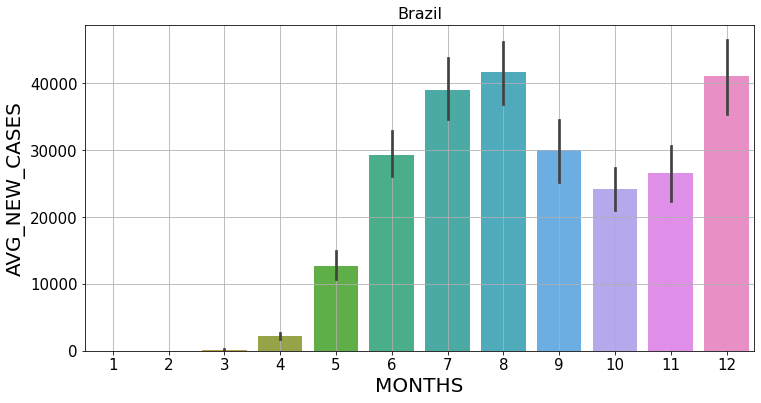

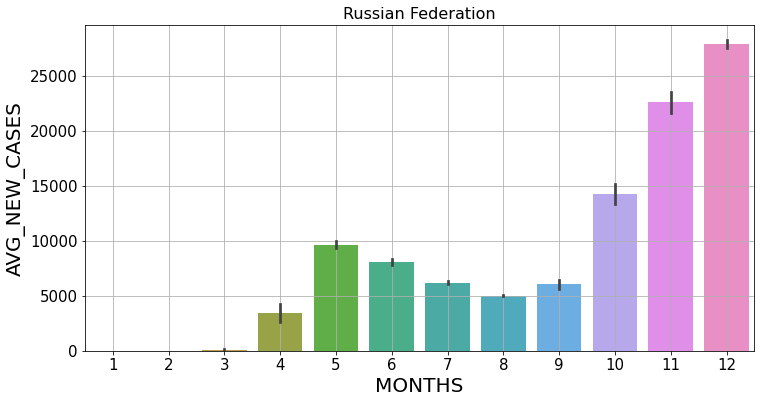

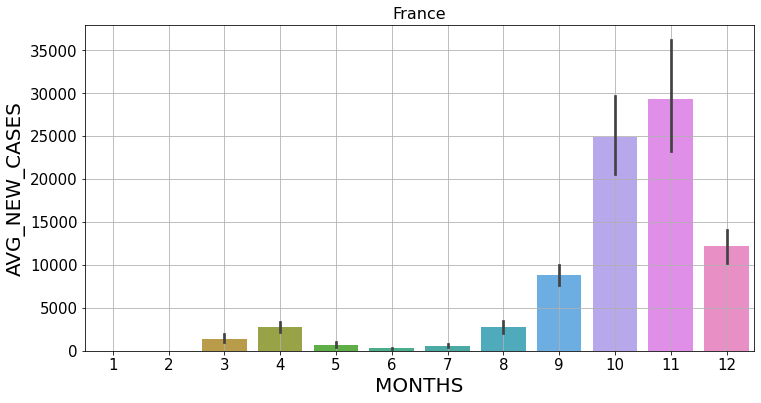

In [107]:
covid.avg_new_cases()

### The Above plot shows that how disease spread over this year in top 5 highly affected countries. You can view your country as well by adding your country name in function argument

### The month ( December ) is the worst month for US as their New_Cases are on top of it more than any other month. 

### Same as with Russia and Brazil their new cases are higher in the month of December more than any other month, but the countries have done well keep cases to their control.

### India has done well keep cases down, as you can see India has seen it's peek in the month of September and then the cases are droping rapidly which is a good sign for India



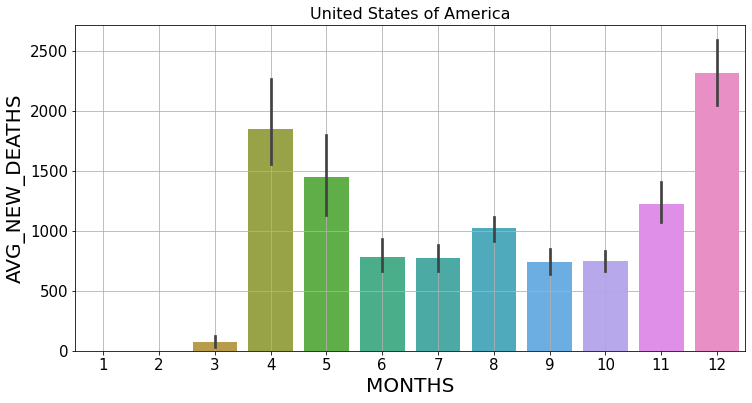

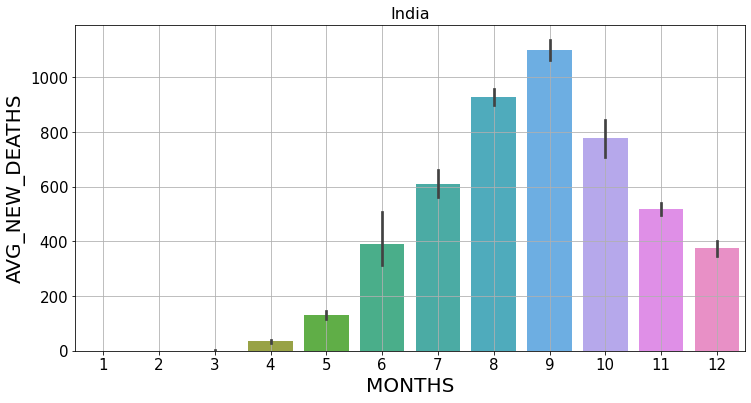

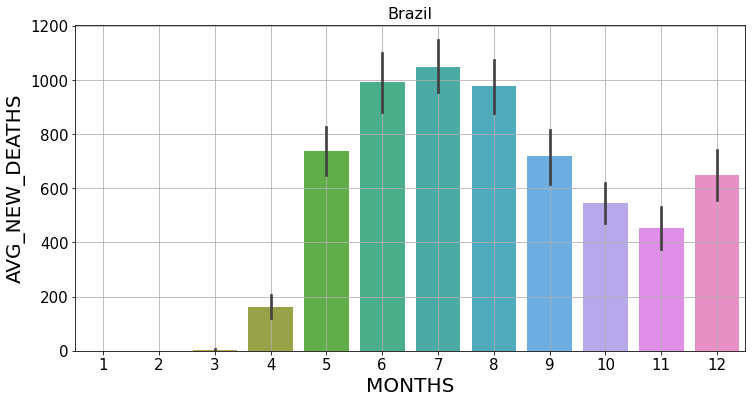

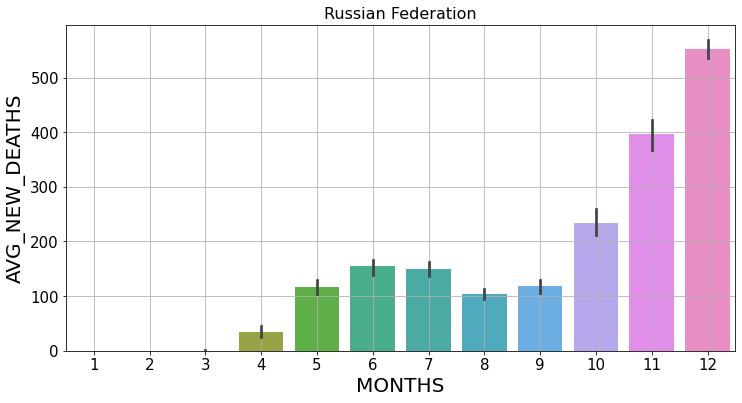

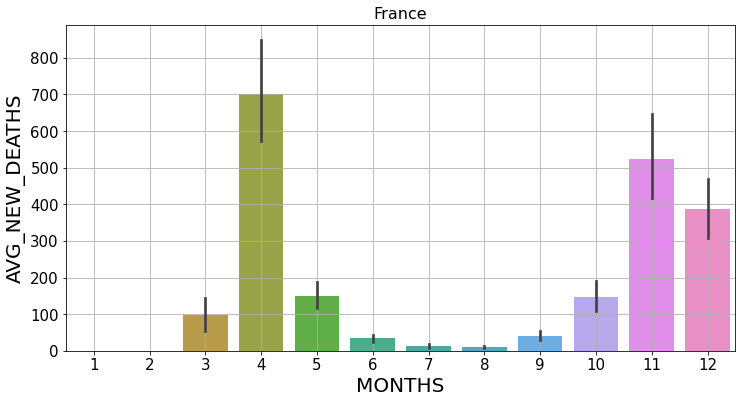

In [108]:
covid.avg_new_deaths()

#### If we talk about Corona the first country that comes on to our mind is US. On Average more than 2300+ people are dying in US in the month of December.

#### India's New Case and New Death's plot is pretty same which means the more no.of.cases the more no.of.Deaths. 


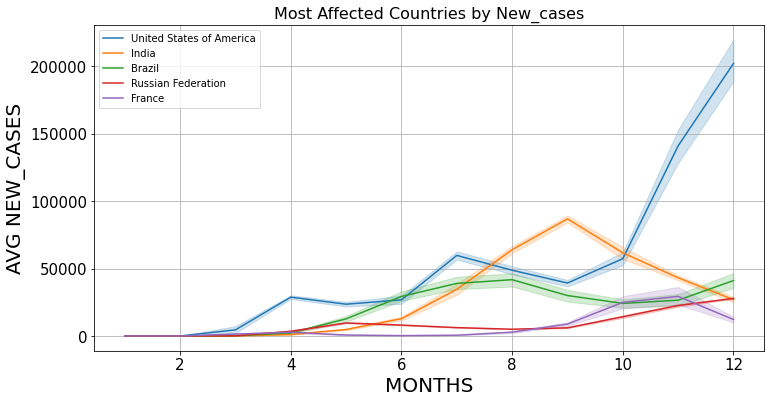

In [109]:
covid.most_affected_countries()


#### While all the countries are fighting to let their cases go down below 50,000 US is the only country that goes more than 2,00,000  in New Cases.

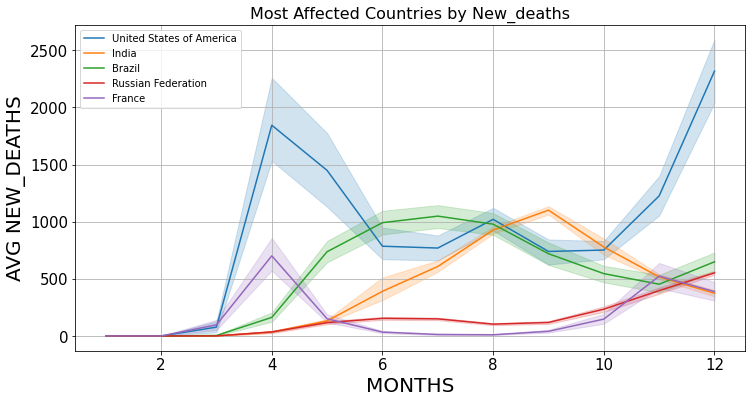

In [110]:
covid.most_affected_countries(by = 'New_deaths')

### Through this plot we can see that how countries have been progressed over the years by New Deaths on each month on average in single graph


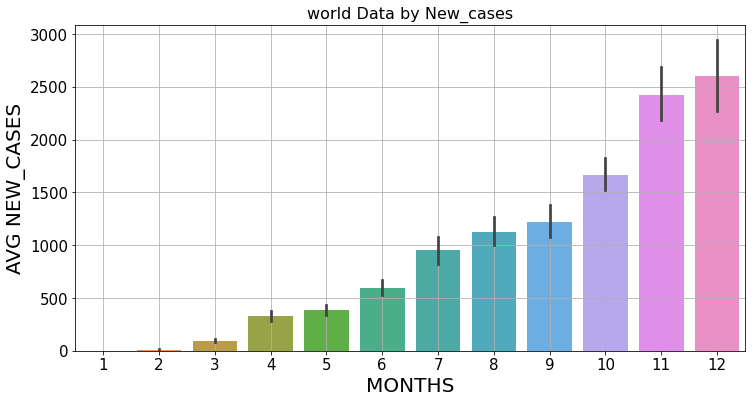

In [111]:
covid.world_analysis()

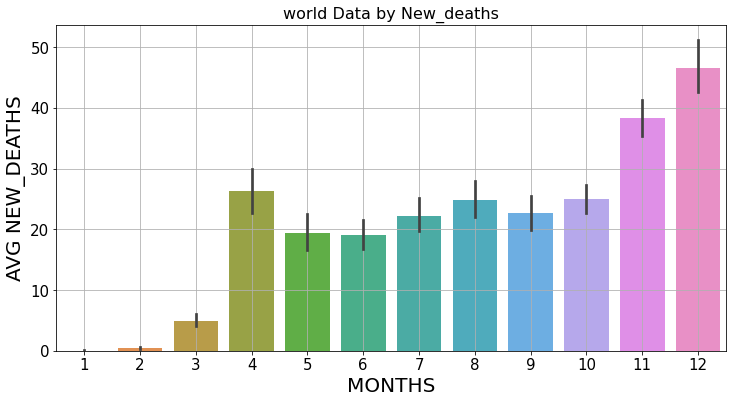

In [112]:
covid.world_analysis(by = 'New_deaths')

### The Above two plot shows how this Corona has affected countries worldwide. The whole 2020 has seen increasing number of cases but in 2021 there is a huge fall in both cases and deaths world wide.

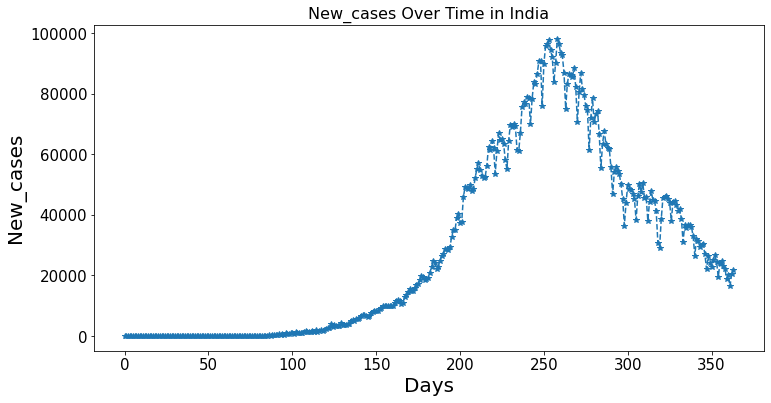

In [113]:
covid.cnt_data(arg = 'New_cases',cnt_name = 'India')

### This Plot shows how country is progressed with respect to New Cases. You can Check for your country.

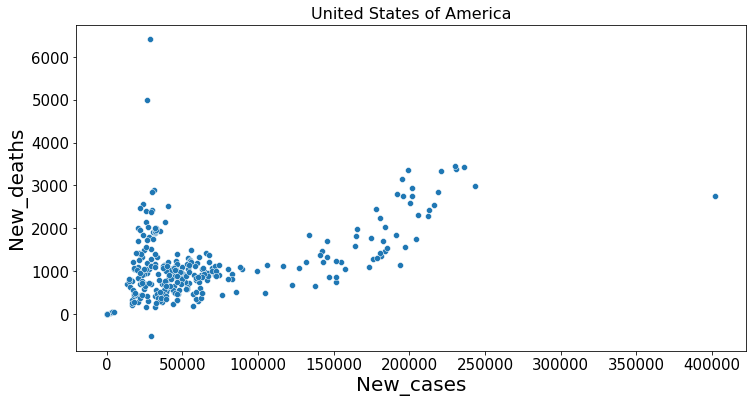

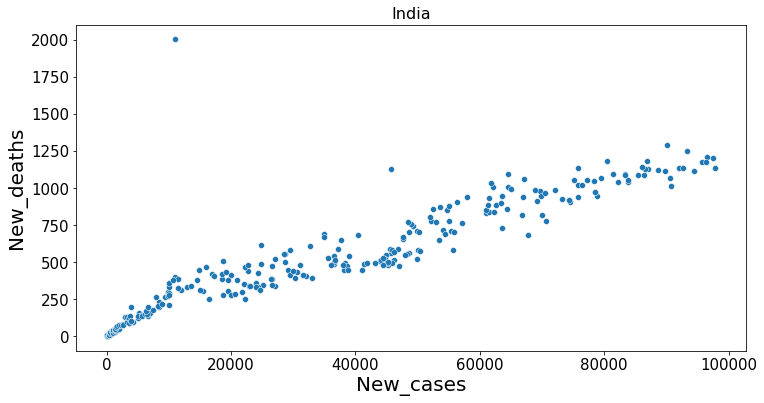

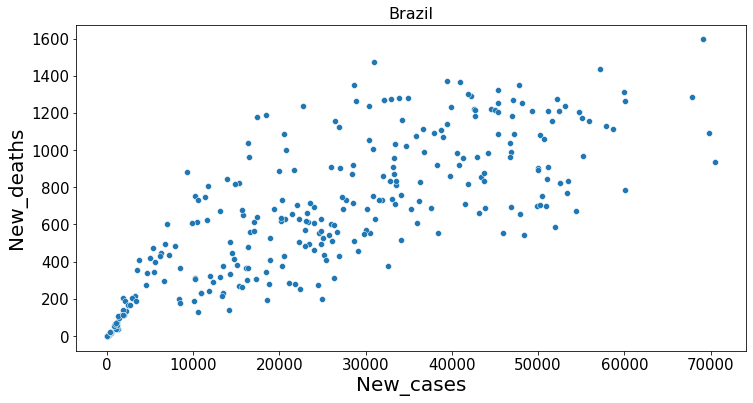

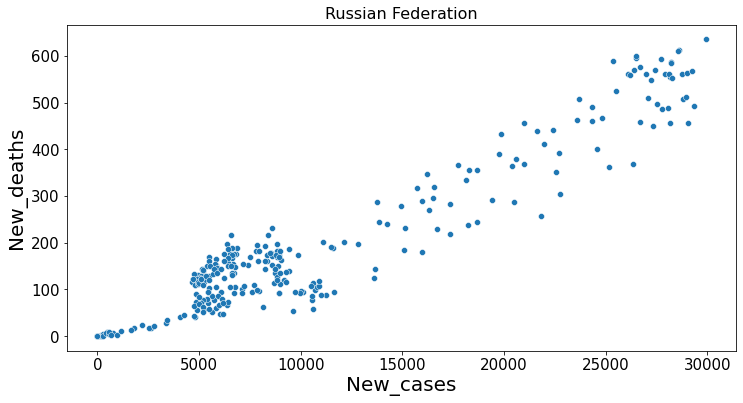

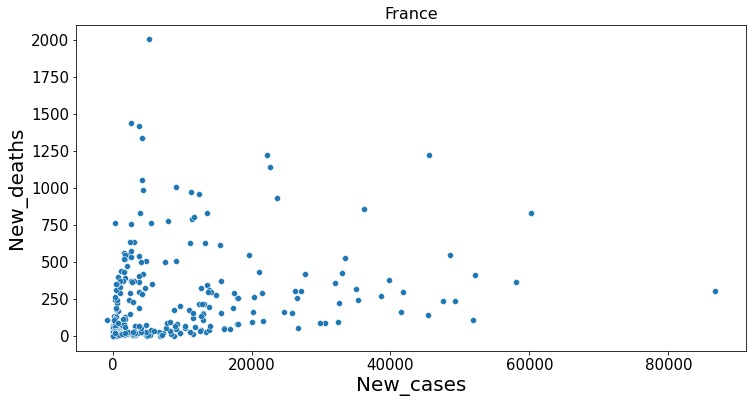

In [114]:
covid.case_and_death()

### This plot shows the spread of new cases and deaths

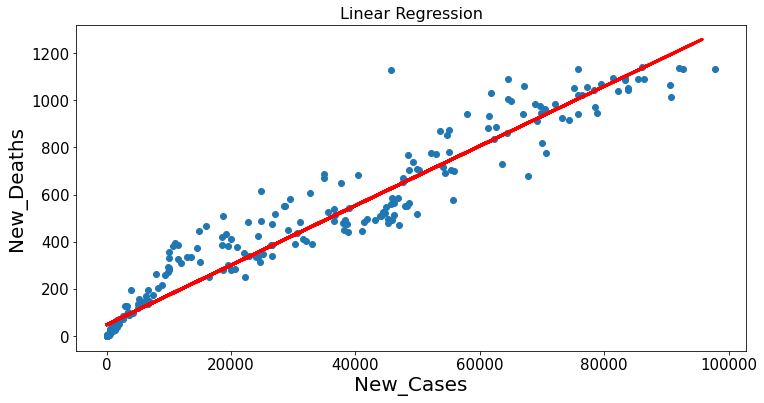

96.51361349541186


In [115]:
covid.Linear_Regression(cnt_name = 'India')

In [141]:
c21 = Corona_2021()

In [142]:
c21.most_affected_region()

WHO_region
EURO     47
AMRO     22
EMRO     18
AFRO     17
SEARO     7
WPRO      7
dtype: int64

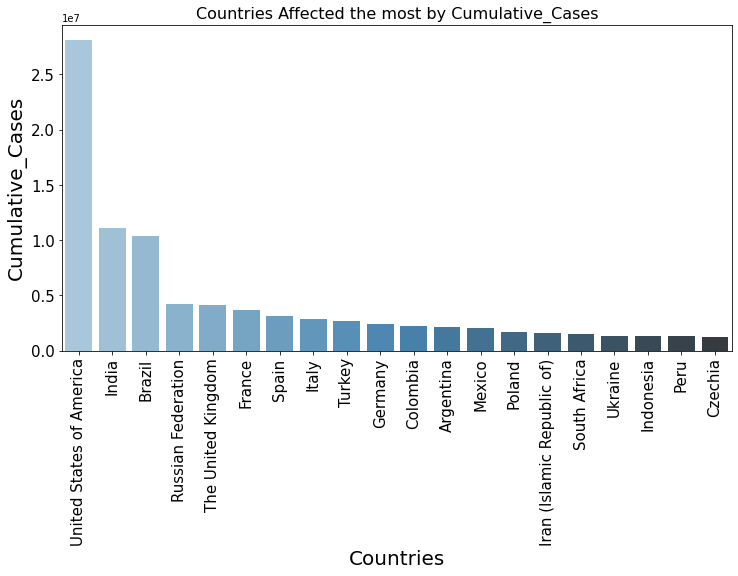

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
United States of America,2021-02-27,US,AMRO,73351,28102166,3240,504654
India,2021-02-27,IN,SEARO,16488,11079979,113,156938
Brazil,2021-02-27,BR,AMRO,65998,10390461,1541,251498
Russian Federation,2021-02-27,RU,EURO,11534,4234720,439,85743
The United Kingdom,2021-02-27,GB,EURO,8523,4163089,345,122415
...,...,...,...,...,...,...,...
Niue,2021-02-27,NU,WPRO,0,0,0,0
Democratic People's Republic of Korea,2021-02-27,KP,SEARO,0,0,0,0
Palau,2021-02-27,PW,WPRO,0,0,0,0


In [143]:
c21.cumulative_cases()

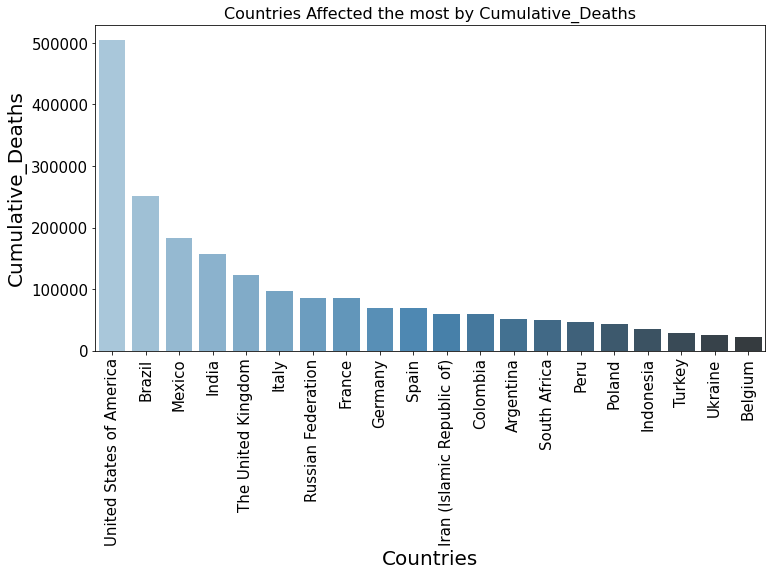

,Date_reported,Country_code,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,,,,
United States of America,2021-02-27,US,AMRO,73351,28102166,3240,504654
Brazil,2021-02-27,BR,AMRO,65998,10390461,1541,251498
Mexico,2021-02-27,MX,AMRO,8462,2069370,877,183692
India,2021-02-27,IN,SEARO,16488,11079979,113,156938
The United Kingdom,2021-02-27,GB,EURO,8523,4163089,345,122415
...,...,...,...,...,...,...,...
Timor-Leste,2021-02-27,TL,SEARO,0,110,0,0
Tokelau,2021-02-27,TK,WPRO,0,0,0,0
Tonga,2021-02-27,TO,WPRO,0,0,0,0


In [144]:
c21.cumulative_deaths()

### United States have crossed more than 2.5 * 10^7 New cases and 50,000 New deaths

### Mexico is the country that have been afffected a lot by new_deaths, there were not much of a cases in mexico but there are more deaths happening there which is a worrying signs for them .


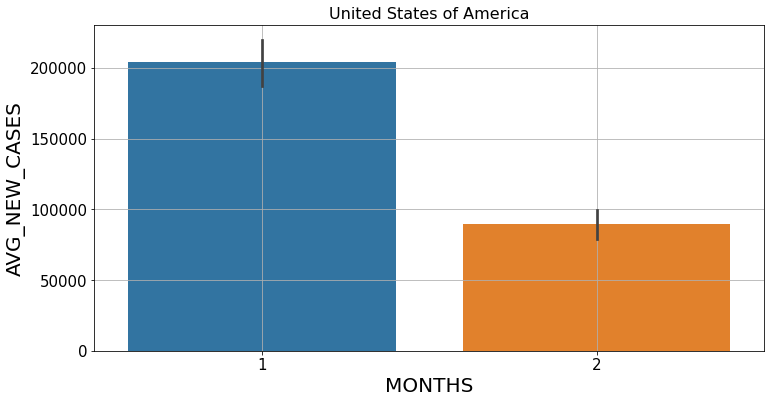

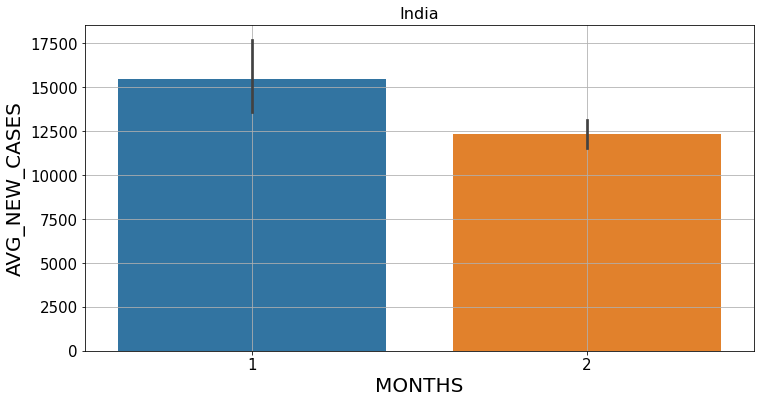

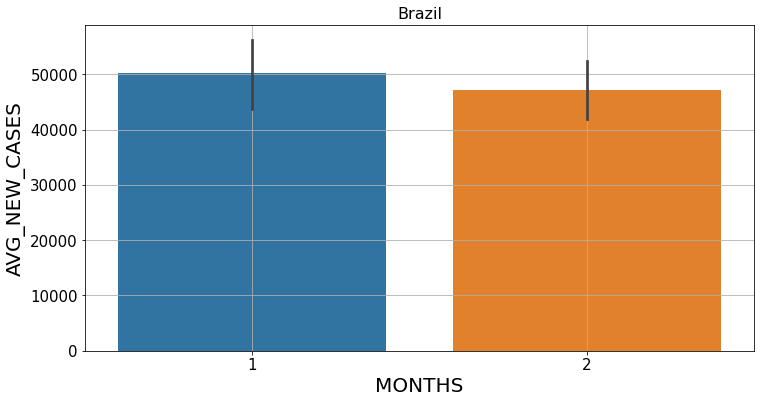

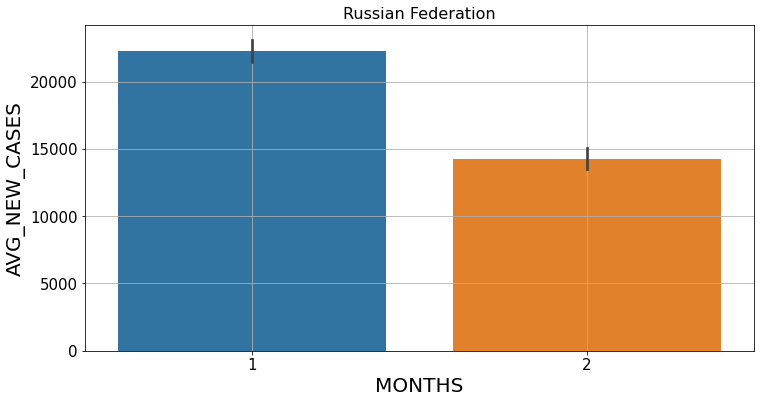

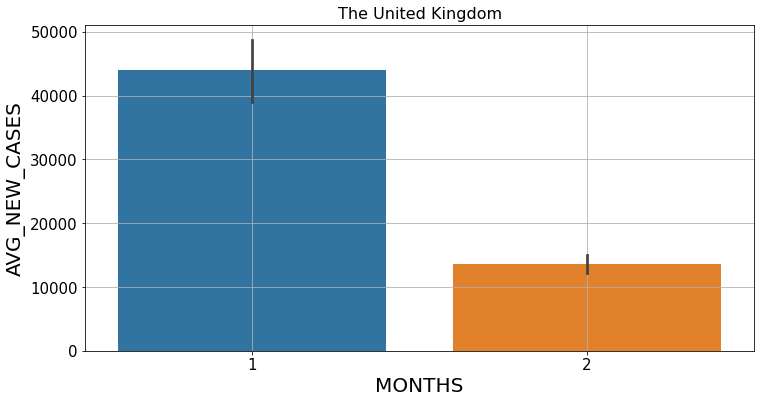

In [145]:
c21.avg_new_cases()

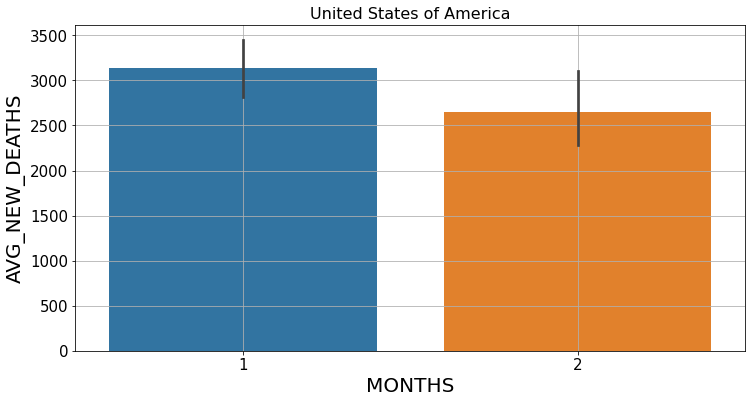

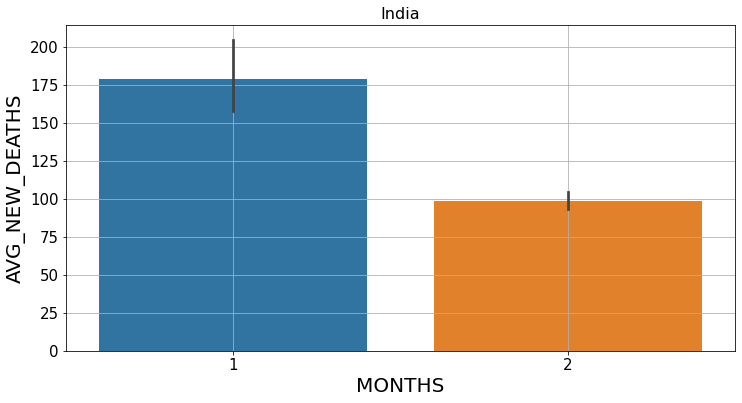

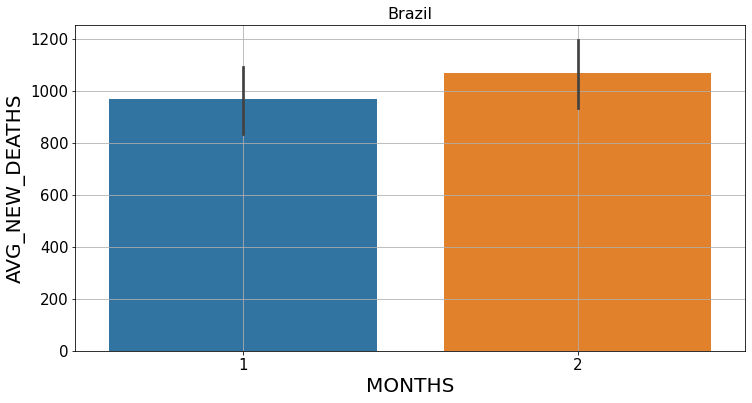

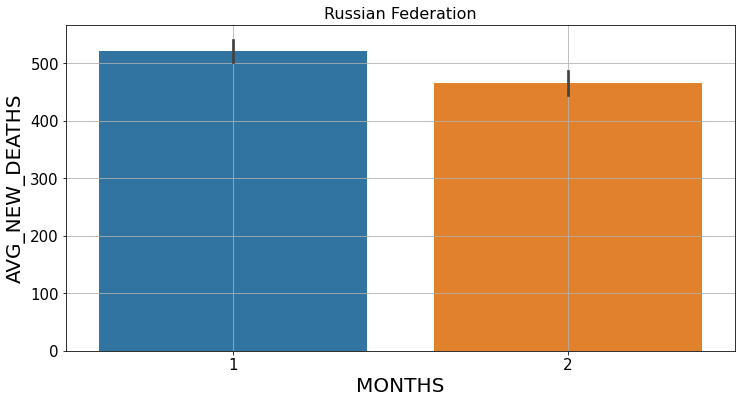

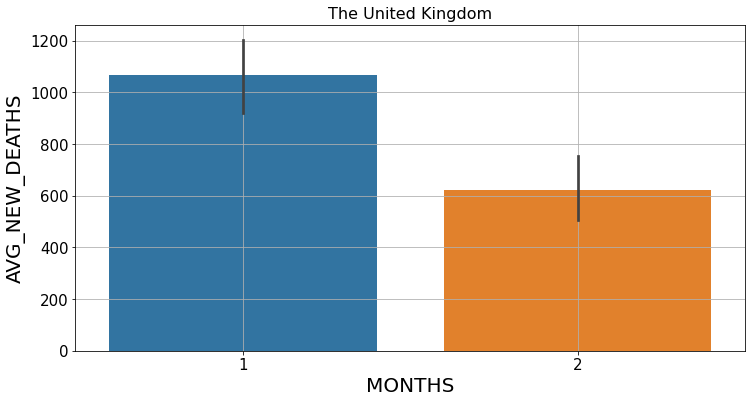

In [146]:
c21.avg_new_deaths()

### Pretty much all the countries have been seeing drop in new cases and new deaths in the month of february (2021) than January (2021)

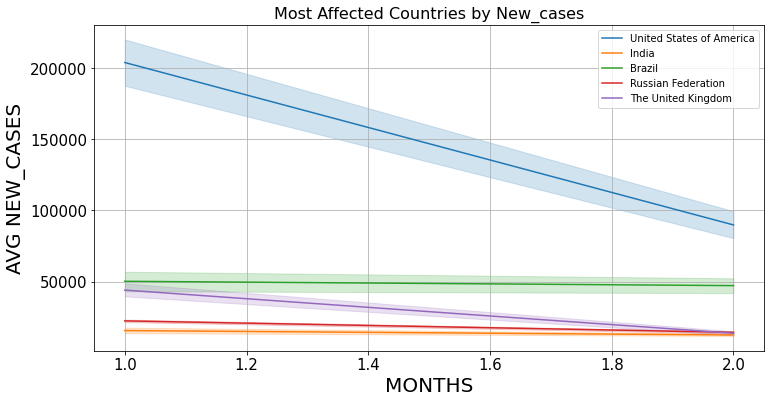

In [147]:
c21.most_affected_countries()

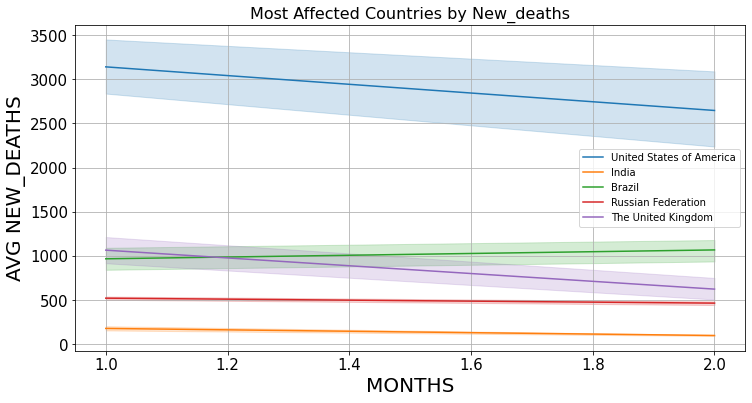

In [148]:
c21.most_affected_countries(by = 'New_deaths')

### This plot clearly shows the good signs of countries that the cases and deaths were dropping significantly especially in USA.

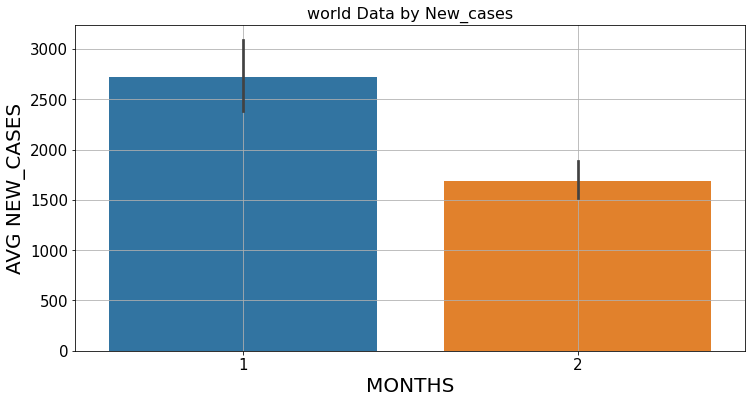

In [149]:
c21.world_analysis()

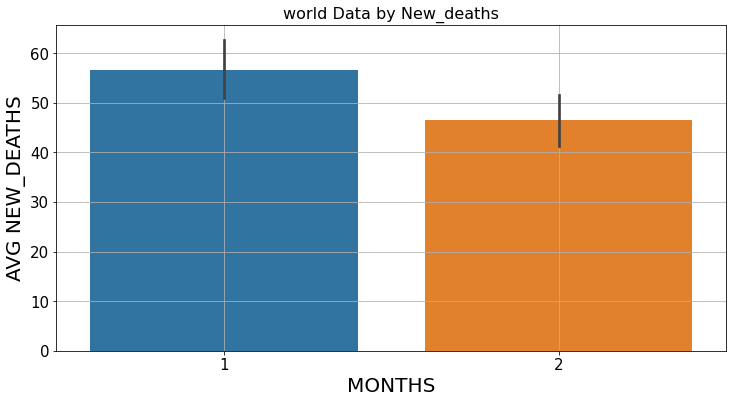

In [150]:
c21.world_analysis(by = 'New_deaths')

### At world level Cases and deaths have been down a lot. 

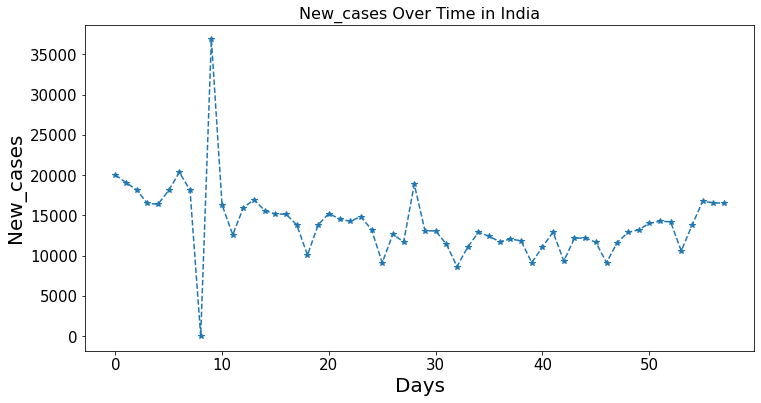

In [151]:
c21.cnt_data()

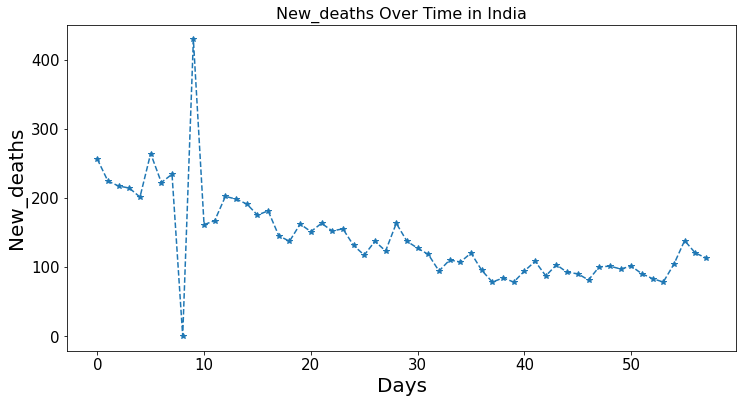

In [152]:
c21.cnt_data(arg = 'New_deaths')

### This plot shows how a country is progressing over the days. In India Cases and Deaths have been dropping a lot

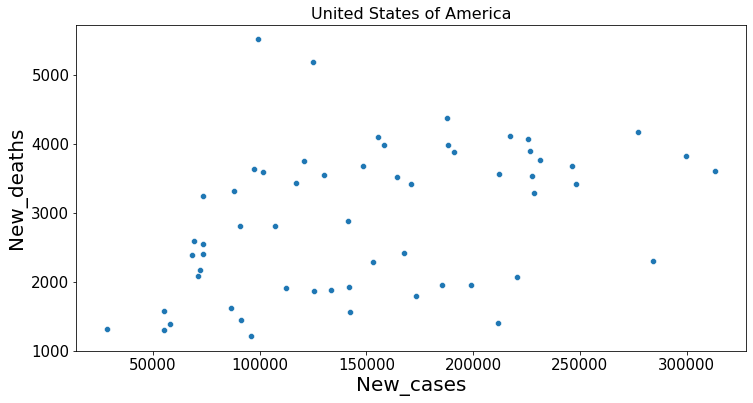

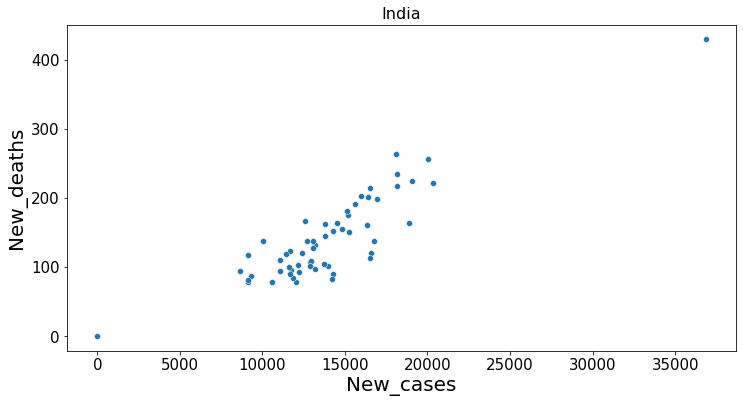

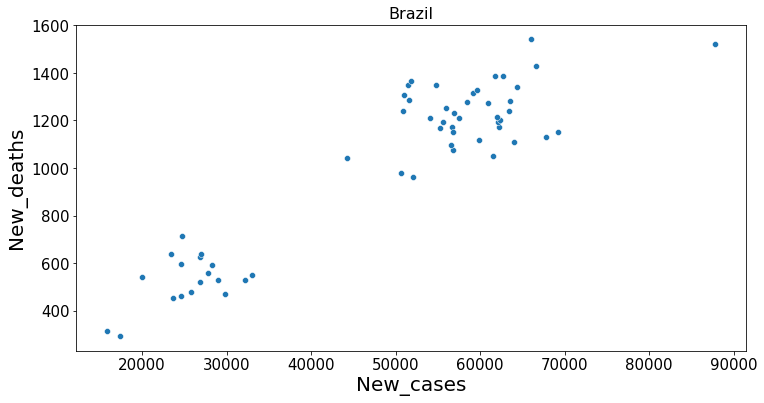

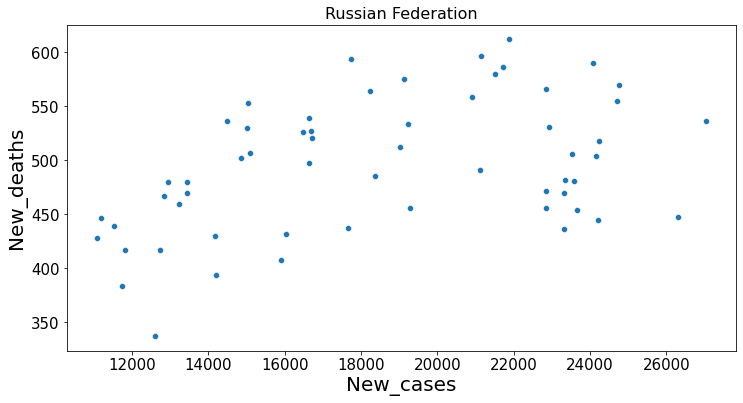

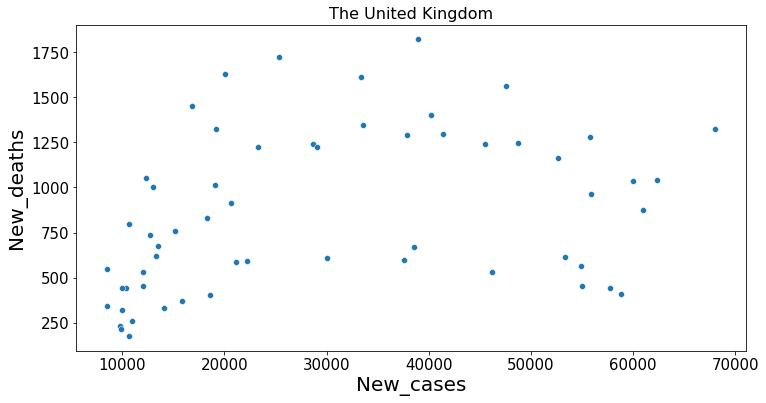

In [153]:
c21.case_and_death()